# **WELCOME FUTURE DATA VIZZARD**

**1. Install and import the basic Python libraries:**




*   **Numpy**: scientific computing in Python.
*  **Pandas**: data manipulation and analysis.
*  **Matplotlib** 2D plotting.



In [17]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install google.colab

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 8, in <module>
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/main.py", line 45, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/__init__.py", line 96, in create_command
    module = importlib.import_module(module_path)
  File "/usr/lib/python3.6/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 994, in _gcd_import
  File "<frozen importlib._bootstrap>", line 971, in _find_and_load
  File "<frozen importlib._bootstrap>", line 955, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 665, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/loca

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**2. Import the Python libraries used for Data Visualisation:**



*   **Seaborn** more advanced dataviz library built on top of Matplotlib


In [2]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**3. We upload our dataset and transform it into a variable**

In [18]:
dataset_filepath = "https://raw.githubusercontent.com/Growth-Tribe/IntroToDataViz/master/Cluster_CRM_binned.csv"
dataset = pd.read_csv(dataset_filepath, index_col="user_id")

In [19]:
!ls

Cluster_CRM_binned.csv	Clustering.pdf	sample_data


**4. We start examining the dataset by printing the first 5 rows, some key information and the datatypes**

---



In [20]:
dataset.shape

(6004, 15)

In [21]:
dataset.head()


,country,age,age_groups,tenure_days,days_since_last_order,n_items_ordered,n_items_kept,n_orders,net_spend,n_sessions,days_since_last_session,n_products_viewed,CLTV_predicted,CLTV_class,cluster_labels
user_id,,,,,,,,,,,,,,,
k100121,United Kingdom,35.8,senior,585,4,1,1,1,162.91,2,4,2,55.368141,low,cluster_1
s100125,United Kingdom,25.1,mid,100,67,18,18,9,398.87,18,39,34,239.364284,high,cluster_3
k100122,United States,34.6,mid,1,1,10,10,1,11.59,1,1,24,50.837997,low,cluster_1
s100126,Spain,21.7,junior,84,5,2,2,2,75.61,4,2,5,58.421963,low,cluster_1
k100123,United Kingdom,18.5,junior,37,35,16,16,16,10.69,19,24,17,257.251708,high,cluster_3


In [ ]:
dataset.dtypes

country                     object
age                        float64
age_groups                  object
tenure_days                  int64
days_since_last_order        int64
n_items_ordered              int64
n_items_kept                 int64
n_orders                     int64
net_spend                  float64
n_sessions                   int64
days_since_last_session      int64
n_products_viewed            int64
CLTV_predicted             float64
CLTV_class                  object
cluster_labels              object
dtype: object

**4.1 In case you would like to dummify the categorical variables:**

In [8]:
dataset_new = pd.read_csv(dataset_filepath,
                   dtype={"country": object, 
                          "age_groups": object,
                          "CLTV_class": object,
                          "cluster_labels": object,
                         },
                   index_col="user_id")  # This indicates that the column "hashed_id"is the index column

dataset_new = pd.get_dummies(dataset_new,drop_first=True) # This hot-encodes the categorical variables
dataset_new.head(10)

,age,tenure_days,days_since_last_order,n_items_ordered,n_items_kept,n_orders,net_spend,n_sessions,days_since_last_session,n_products_viewed,CLTV_predicted,country_China,country_France,country_Germany,country_Italy,country_Netherlands,country_Other,country_Russia,country_Spain,country_United Kingdom,country_United States,age_groups_mid,age_groups_senior,CLTV_class_low,CLTV_class_mid,cluster_labels_cluster_1,cluster_labels_cluster_2,cluster_labels_cluster_3,cluster_labels_cluster_4
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
k100121,35.8,585,4,1,1,1,162.91,2,4,2,55.368141,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0
s100125,25.1,100,67,18,18,9,398.87,18,39,34,239.364284,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
k100122,34.6,1,1,10,10,1,11.59,1,1,24,50.837997,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0
s100126,21.7,84,5,2,2,2,75.61,4,2,5,58.421963,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
k100123,18.5,37,35,16,16,16,10.69,19,24,17,257.251708,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
s100127,35.1,280,90,1,1,1,720.30,1,10,1,86.413805,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
k100124,20.5,261,146,8,8,7,45.82,13,63,18,153.583435,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
s100128,34.5,19,5,1,1,1,73.45,2,4,2,41.011264,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0
k100125,45.0,92,62,2,0,2,-12.60,3,29,3,54.674448,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0


**5.1 We do our first scatterplots!**

We start with simple plotting, then gradually we are adding new components

![alt text](https://media.giphy.com/media/3ov9jNw01KHVtg4Sd2/giphy.gif)


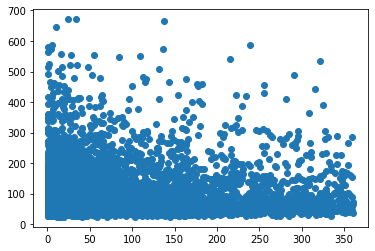

In [9]:
# Create a scatter plot by defining the x and y axis and the dataset itself
plot_1 = plt.scatter( x="days_since_last_order", y="CLTV_predicted", data=dataset)


**5.2 Let's modify it!**

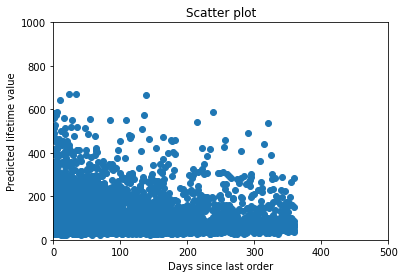

In [10]:
# Create a scatter plot by defining the x and y axis and the dataset itself
plot_2 = plt.scatter( x="days_since_last_order", y="CLTV_predicted", data=dataset)

# control x and y limits
plt.ylim(0, 1000)
plt.xlim(0, 500)

# rename the axis labels and the chart itself
plt.title('Scatter plot')
plt.xlabel('Days since last order')
plt.ylabel('Predicted lifetime value')

plt.show()

For more on scatter plots in matplotlib: 


*   https://pythonspot.com/matplotlib-scatterplot/
*   https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html


**5.3 Let's try now the scatter plot from Seaborn**

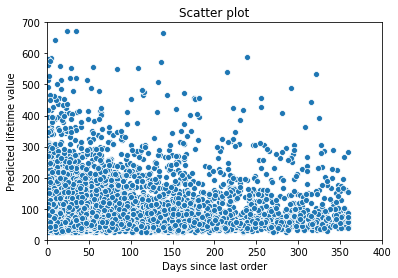

In [11]:
# Create a scatter plot by defining the x and y axis and the dataset itself

plot_3 = sns.scatterplot(x="days_since_last_order", y="CLTV_predicted",
                     data=dataset)

# control x and y limits
plt.ylim(0, 700)
plt.xlim(0, 400)

# rename the axis labels
plt.xlabel('Days since last order')
plt.ylabel('Predicted lifetime value')
plt.title('Scatter plot')

plt.show()

**5.4 Let's play with the size of the chart**

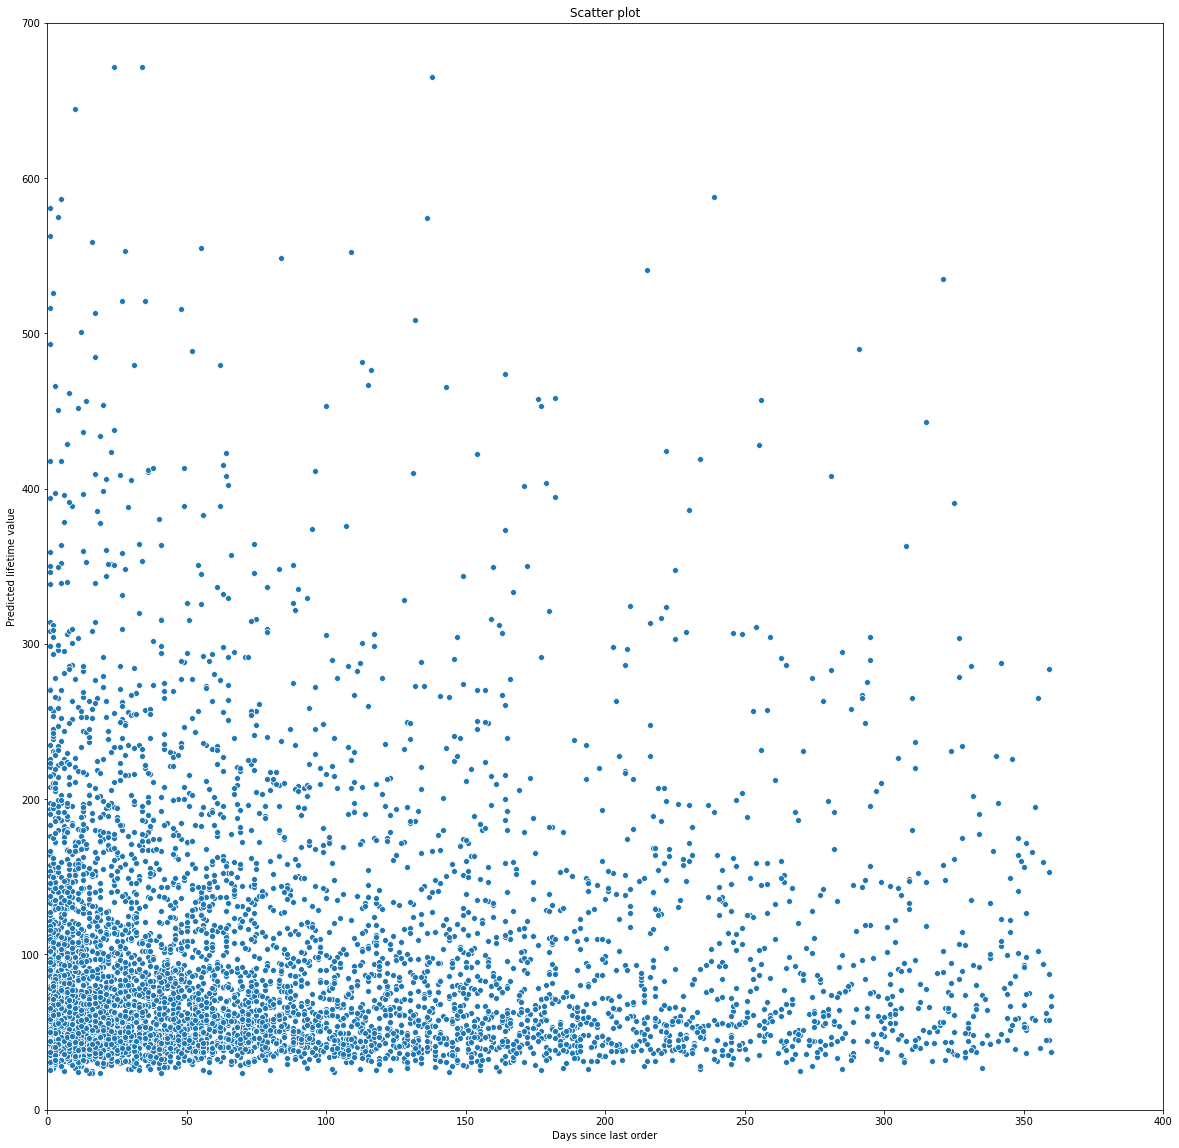

In [12]:
plt.figure(figsize=(20,20))

plot_4 = sns.scatterplot(x="days_since_last_order", y="CLTV_predicted", 
                     data=dataset)

# control x and y limits
plt.ylim(0, 700)
plt.xlim(0, 400)

# rename the axis labels
plt.xlabel('Days since last order')
plt.ylabel('Predicted lifetime value')
plt.title('Scatter plot')

plt.show()

**5.5 Let's see how to use Seaborn for more indepth bivariate analysis**

In [13]:
dataset_compact = pd.DataFrame(dataset, columns = ['CLTV_predicted', 'age',"days_since_last_order","n_orders"]) 

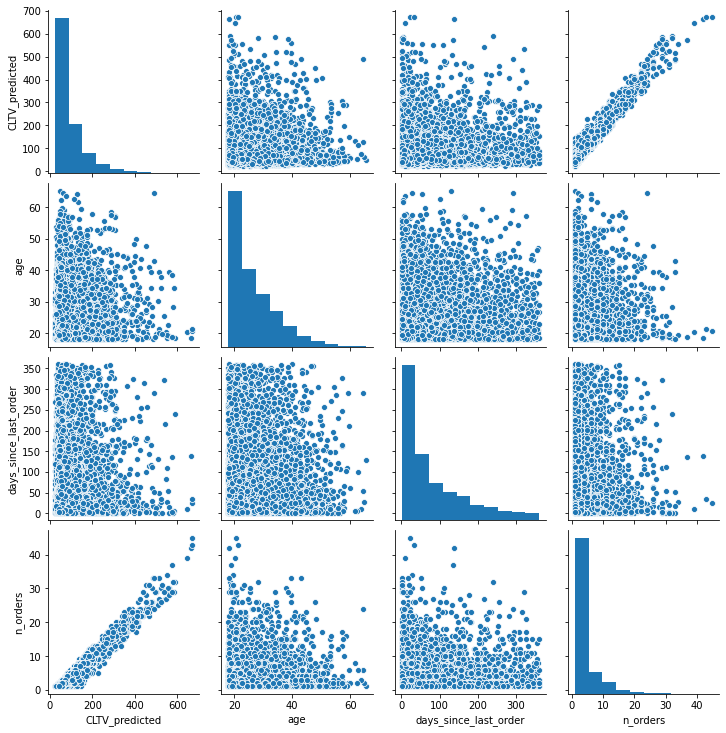

In [14]:
sns.pairplot(dataset_compact)

**5.6 Let's color the markers according to customer segments and save it as a pdf**

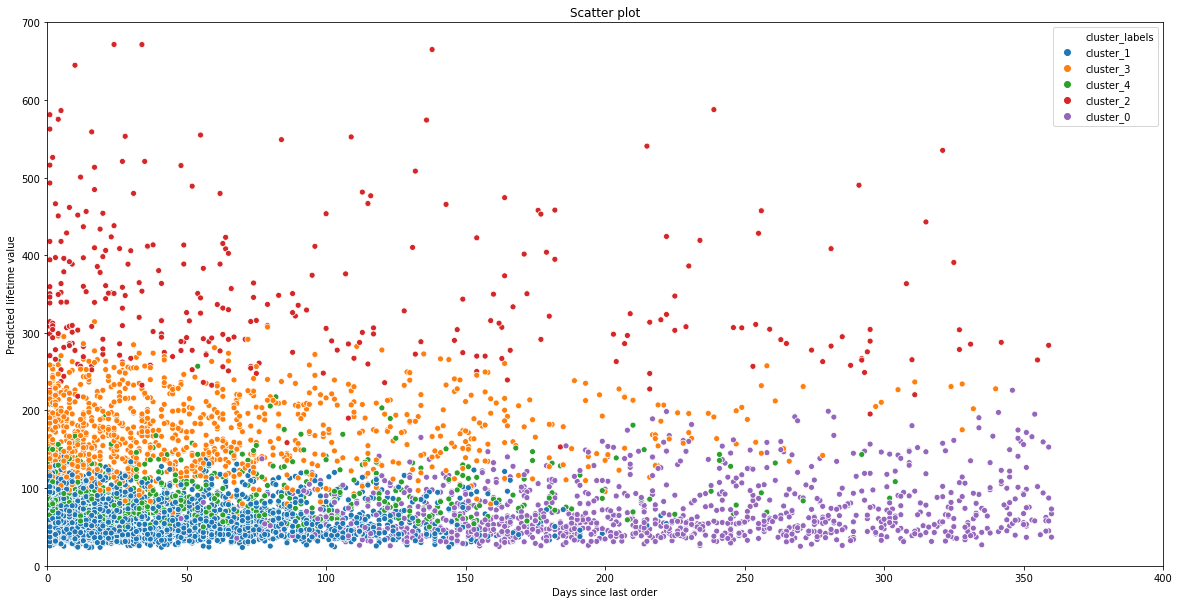

In [15]:
# Use the 'hue' argument to provide a factor variable to use different colors

plt.figure(figsize=(20,10))

plot_5 = sns.scatterplot(x="days_since_last_order", y="CLTV_predicted", hue='cluster_labels',
                     data=dataset)


# Move the legend to an empty part of the plot
plt.legend(loc='upper right')

# control x and y limits
plt.ylim(0, 700)
plt.xlim(0, 400)

# rename the axis labels
plt.xlabel('Days since last order')
plt.ylabel('Predicted lifetime value')
plt.title('Scatter plot')

plt.savefig('Clustering.pdf')

plt.show()

More info on downloading files:

https://dzone.com/articles/simple-examples-of-downloading-files-using-python


https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/

To download the image above while hosted on Jupyter or Binder, just right-click the image and "Save the image as"


**7. Let's try interactive charts, like Plotly**

In [ ]:
import plotly.express as px

fig = px.scatter(dataset, x="days_since_last_order", y="CLTV_predicted", color="cluster_labels")
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(dataset, x="days_since_last_order", y="CLTV_predicted", 
                 facet_col="age_groups", color="net_spend")
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(dataset, x="days_since_last_order", y="CLTV_predicted", 
                 color="net_spend", animation_frame="country")

fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(dataset, x="days_since_last_order", y="CLTV_predicted", animation_frame="age_groups",
                 animation_group="country", size="CLTV_predicted", size_max=60, hover_name="country", text="country")

fig.update_traces(textposition='top center')

fig.show()

# **CONGRATULATIONS**




> *If you would like to customize further your scatter plot, check out these websites:* 

http://python-graph-gallery.com/scatter-plot/

https://plot.ly/python/ipython-notebook-tutorial/


https://www.kaggle.com/alexisbcook/scatter-plots 


---

# **GOOD LUCK!**

![alt text](https://media.giphy.com/media/pDgHg2Lcju3Ty/giphy.gif)